# 00. Trajectory Inspection

There are 12 Trp-Cage (TC5b) trajectories we will be analyzing. 

If you haven't yet downloaded these files, please follow the instructions in `../TC5b-data`

## Trp-Cage (TC5b)

TC5b is a fast-folding miniprotein based on a truncated and stabiilized C-terminal region of the peptide exendin-4 (EX4) from Gila monster saliva, designed by the Anderson group (Neidigh et al. 2001).

```
miniprotein          sequence                      T_m (˚C)
-----------          --------------------------    ---
Trp-Cage TCb5        NLYIQWLKD GGPSSG RPPPS        42
```

The NMR solution structure of TCb5 is [PDB:1L2Y](https://www.rcsb.org/structure/1l2y) 

## Description of trajectory data

Simulations of TCb5 were performed on the Folding@home distributed computing platform (project 16959, RUN 9) using the GROMACS molecular dynamics package. Selected trajectory lengths are between 4 and 5 microseconds, with snapshots taken every 100 ps. 

```
trajectory filename       length (µs)
----------------------    ----
p16959r9c29-whole.xtc     4.415 
p16959r9c83-whole.xtc     4.720
p16959r9c100-whole.xtc    5.000
p16959r9c109-whole.xtc    4.830
p16959r9c127-whole.xtc    4.905
p16959r9c151-whole.xtc    5.000
p16959r9c166-whole.xtc    5.000
p16959r9c219-whole.xtc    4.735
p16959r9c312-whole.xtc    4.960
p16959r9c394-whole.xtc    4.565
p16959r9c631-whole.xtc    5.000
p16959r9c726-whole.xtc    4.840

                 TOTAL   57.970  µs
```

### Methods



### `prod.mdp`

```
; Output control
nstxout                 = 500000       ; save full coordinates every 1000 ps (1 ns) (*.trr)
nstvout                 = 500000       ; save velocities every 1000 ps (1 ns)
nstenergy               = 50000        ; save energies every 100 ps
nstlog                  = 50000        ; update log file every 100 ps
; Output frequency and precision for .xtc file
nstxout-compressed      = 50000        ; every 100 ps
compressed-x-precision  = 1000
; This selects the subset of atoms for the compressed
; trajectory file. You can select multiple groups. By
; default, all atoms will be written.
compressed-x-grps       =  non-Water


; Bond parameters
continuation            = no        ; first dynamics run
constraint_algorithm    = lincs     ; holonomic constraints
constraints             = h-bonds   ; bonds involving H are constrained
lincs_iter              = 1         ; accuracy of LINCS
lincs_order             = 4         ; also related to accuracy

; Nonbonded settings
cutoff-scheme           = Verlet    ; Buffered neighbor searching
nstlist                 = 10        ; 20 fs, largely irrelevant with Verlet
rcoulomb                = 1.0       ; short-range electrostatic cutoff (in nm)
rvdw                    = 1.0       ; short-range van der Waals cutoff (in nm)
DispCorr                = EnerPres  ; account for cut-off vdW scheme

; Electrostatics
coulombtype             = PME       ; Particle Mesh Ewald for long-range electrostatics
pme_order               = 4         ; cubic interpolation
fourierspacing          = 0.16      ; grid spacing for FFT
; Temperature coupling is on
tcoupl                  = no        ; sd takes care of temperature coupling
tc-grps                 = Protein Non-Protein   ; two coupling groups - more accurate
tau_t                   = 0.1     0.1           ; time constant, in ps
ref_t                   = 300     300           ; reference temperature, one for each group, in K
; Pressure coupling is off
pcoupl                  = no        ; no pressure coupling in NVT
; Periodic boundary conditions
pbc                     = xyz       ; 3-D PBC
; Velocity generation
gen_vel                 = yes       ; assign velocities from Maxwell distribution
gen_temp                = 300       ; temperature for Maxwell distribution
gen_seed                = -1        ; generate a random seed
```




### References

1. Neidigh, Jonathan W., R. Matthew Fesinmeyer, and Niels H. Andersen. “Designing a 20-Residue Protein.” Nature Structural Biology 9, no. 6 (June 1, 2002): 425–30. https://doi.org/10.1038/nsb798.

2. Voelz, Vincent A., Vijay S. Pande, and Gregory R. Bowman. “Folding@home: Achievements from over 20 Years of Citizen Science Herald the Exascale Era.” Biophysical Journal, March 2023, S0006349523002011. https://doi.org/10.1016/j.bpj.2023.03.028.










## Do any of the 12 TCb5 trajectories  fold?

We will read in the trajectories and compute the RMSD-to-native over time

In [25]:
import os, glob

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# for visualization of molecular structures:
import nglview
import mdtraj
from threading import Timer
from nglview.player import TrajectoryPlayer


# Read in the simulated trajectories

datadir = '../TC5b-data'
filenames = [os.path.join(datadir, s.strip()) for s in """p16959r9c29-whole.xtc 
p16959r9c83-whole.xtc 
p16959r9c100-whole.xtc
p16959r9c109-whole.xtc
p16959r9c127-whole.xtc
p16959r9c151-whole.xtc
p16959r9c166-whole.xtc
p16959r9c219-whole.xtc
p16959r9c312-whole.xtc
p16959r9c394-whole.xtc
p16959r9c631-whole.xtc
p16959r9c726-whole.xtc""".split('\n')]
print(filenames)

pdbfile = os.path.join(datadir, 'xtc_atoms.gro')

# Create a list of mdtraj Trajectory() objects
trajs = []
for fn in filenames:
    print(f'Loading {fn}... ', end='')
    trj = mdtraj.load(fn, top=pdbfile)
    
    print('Processing for visualization...', end='')
    # 1. they have ions in them -- let's strip these out
    trj_protein = trj.atom_slice(trj.top.select("protein"))
    # 2. they are not centered - let's center them
    trj_protein.center_coordinates()
    # 3. they are not RMSD-aligned - let's center them on a frame at ~4 us
    trj_protein.superpose(trj_protein, frame=4000, parallel=True)
    trajs.append( trj_protein )
    print('...Done')



['../TC5b-data/p16959r9c29-whole.xtc', '../TC5b-data/p16959r9c83-whole.xtc', '../TC5b-data/p16959r9c100-whole.xtc', '../TC5b-data/p16959r9c109-whole.xtc', '../TC5b-data/p16959r9c127-whole.xtc', '../TC5b-data/p16959r9c151-whole.xtc', '../TC5b-data/p16959r9c166-whole.xtc', '../TC5b-data/p16959r9c219-whole.xtc', '../TC5b-data/p16959r9c312-whole.xtc', '../TC5b-data/p16959r9c394-whole.xtc', '../TC5b-data/p16959r9c631-whole.xtc', '../TC5b-data/p16959r9c726-whole.xtc']
Loading ../TC5b-data/p16959r9c29-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c83-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c100-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c109-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c127-whole.xtc... Processing for visualization......Done
Loading ../TC5b-data/p16959r9c151-whole.xtc... Processing for visualization......Done
Loading ../TC5b-dat

<mdtraj.Trajectory with 38 frames, 20 atoms, 20 residues, without unitcells>
<mdtraj.Trajectory with 44184 frames, 20 atoms, 20 residues, and unitcells>
(44184,)
(44184,)
(47243,)
(47243,)
(50029,)
(50029,)
(48345,)
(48345,)
(49079,)
(49079,)
(50052,)
(50052,)
(50056,)
(50056,)
(47384,)
(47384,)
(49646,)
(49646,)
(45702,)
(45702,)
(50073,)
(50073,)
(48452,)
(48452,)


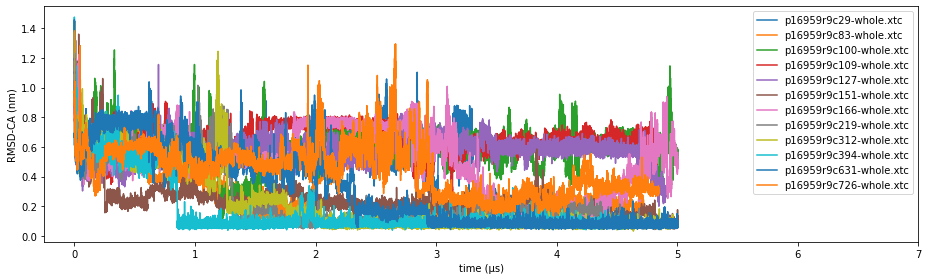

In [30]:
# load a trajectory for the PDB structure
# NOTE: 1L2Y has 38 models consistent with the solution-state NMR measurements, each are read in as a frame
native = os.path.join(datadir, '1l2y.pdb')
native_trj = mdtraj.load(native, top=native)
native_trj_CA = native_trj.atom_slice(native_trj.top.select("protein and name CA"))  # slice out alpha-carbons
print(native_trj_CA)

# slice out alpha carbons for the trajectory data
trajs_CA = [trj.atom_slice(trj.top.select("protein and name CA")) for trj in trajs]
print(trajs_CA[0])

# compute RMSDs to the refenence (model 0 of the PDB)
rmsds_CA = [mdtraj.rmsd(trj_CA, native_trj_CA, frame=0) for trj_CA in trajs_CA]
  
# plot them!
us_per_frame = 0.0001
plt.figure(figsize=(13,4))
for i in range(len(rmsds_CA)):
    rmsd_CA = rmsds_CA[i]
    print(rmsd_CA.shape)
    time_in_us = np.arange(0, rmsd_CA.size*us_per_frame, us_per_frame)
    print(time_in_us.shape)
    plt.plot(time_in_us, rmsd_CA, label=filenames[i].replace('../TC5b-data/',''))
plt.xlim(-0.25, 7)
plt.xlabel('time (µs)')
plt.ylabel('RMSD-CA (nm)')
plt.legend(loc='best')
plt.tight_layout()

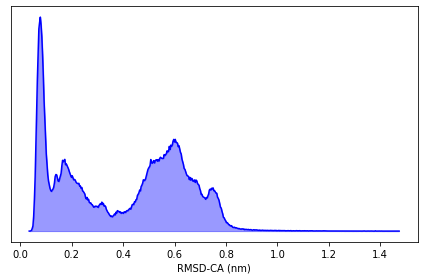

In [38]:
# Make a histogram of all_rmsds
all_rmsds_CA = np.concatenate(rmsds_CA)
counts, bin_edges = np.histogram(all_rmsds_CA, bins=500)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2

plt.figure()
plt.fill_between(bin_centers, counts, alpha=0.4, color='b')
plt.plot(bin_centers, counts, color='b')
plt.yticks([])
plt.xlabel('RMSD-CA (nm)')
plt.tight_layout()


In [39]:
# Let's take a look at c394 -- the traj that folds the "best"

print(filenames[-3])

widget = nglview.show_mdtraj(trajs[-3])
p = TrajectoryPlayer(widget)
widget.add_ball_and_stick()
# p.spin = True
# def stop_spin():
#     p.spin = False
#    widget.close()
# Timer(30, stop_spin).start()
widget

../TC5b-data/p16959r9c394-whole.xtc


NGLWidget(max_frame=45701)